In [6]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('../dataset/processed/artigos_de_partidos/artigos_partidos.csv')
df.head()

,Partido,Conteudo,URL,Vies
0,Novo,Multa imposta ao candidato na condenação foi...,https://novo.org.br/plenario-do-tse-acata-acao...,direita
1,Novo,Cadastro será usado como identificação junt...,https://novo.org.br/aprovado-na-camara-o-subst...,direita
2,Novo,A Bancada do NOVO na Câmara considera temerá...,https://novo.org.br/bancada-do-novo-requer-urg...,direita
3,Novo,Um ambiente com ausência de segurança juríd...,https://novo.org.br/aprovado-em-1-turno-projet...,direita
4,Novo,"Segundo o MP, o estado do RJ sequer utiliza os...",https://novo.org.br/adriana-balthazar-atua-con...,direita


In [8]:
df.shape

(11713, 4)

In [9]:
df.isnull().sum()

Partido     0
Conteudo    0
URL         0
Vies        0
dtype: int64

In [5]:
df[df['Conteudo'].isna()].shape

(0, 4)

In [49]:
df.shape

(8976, 4)

# Proporção de labels

In [10]:
porcentagens = df['Vies'].value_counts().values / df.shape[0] * 100

for i in range(len(porcentagens)):
    porcentagens[i] = round(porcentagens[i], 1)  # Modify each element by doubling its value

porcentagens

array([46.6, 31.4, 22. ])

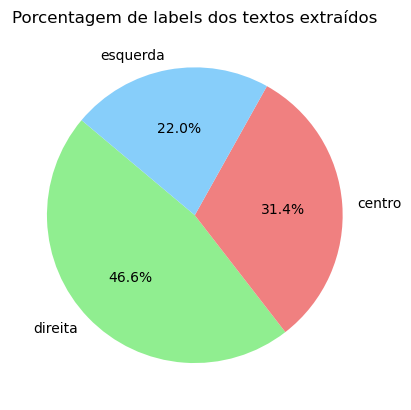

In [12]:
# Dados para o gráfico de pizza
classes = df['Vies'].value_counts().index
porcentagens  # Porcentagens para cada categoria

# Cores para cada fatia (opcional)
colors = ['lightgreen', 'lightcoral', 'lightskyblue', 'gold']

# Criar o gráfico de pizza
plt.pie(porcentagens, labels=classes, colors=colors, autopct='%1.1f%%', startangle=140)

# Adicionar um título
plt.title('Porcentagem de labels dos textos extraídos')

plt.savefig('proporcao-labels.png')

# Mostrar o gráfico
plt.show()

# Proporção de partidos

## Barras

In [13]:
df['Partido'].value_counts()

Partido
PL              3385
PSB             1762
Novo            1197
PV               868
PSTU             627
PCB              617
PCDoB            602
MDB              601
PT               597
PP               587
PDT              447
União Brasil     284
Rede             124
PSOL              15
Name: count, dtype: int64

In [14]:
classes = df['Partido'].value_counts().index

In [31]:
classes = list(classes)
classes[-3] = 'UNIÃO'
classes

['PL',
 'PSB',
 'Novo',
 'PV',
 'PSTU',
 'PCB',
 'PCDoB',
 'MDB',
 'PT',
 'PP',
 'PDT',
 'UNIÃO',
 'Rede',
 'PSOL']

In [32]:
pos = np.arange(len(classes))

In [33]:
qnt_linhas = df['Partido'].value_counts().values

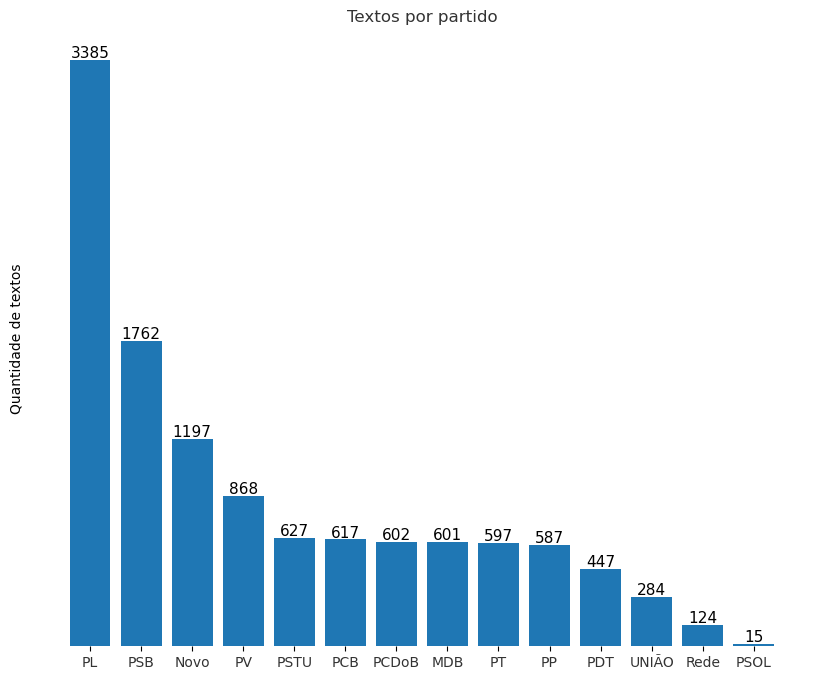

In [34]:
plt.figure(figsize=(10,8))
bars = plt.bar(pos, qnt_linhas, align='center', linewidth=0)
plt.xticks(pos, classes, alpha=0.8)
plt.ylabel('Quantidade de textos')
plt.title('Textos por partido', alpha=0.8)

# remocao das bordas
for spine in plt.gca().spines.values(): 
    spine.set_visible(False)

# remocao dos labels y
plt.yticks([])

for bar in bars:

    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, str(int(height)), ha='center', color='black', fontsize=11)

plt.savefig('textos-por-partido.png')

In [57]:
# IDEIA: COLORIR BARRAS DE ACORDO COM VIES DO PARTIDO

# Tokens

In [35]:
df.head()

,Partido,Conteudo,URL,Vies
0,Novo,Multa imposta ao candidato na condenação foi...,https://novo.org.br/plenario-do-tse-acata-acao...,direita
1,Novo,Cadastro será usado como identificação junt...,https://novo.org.br/aprovado-na-camara-o-subst...,direita
2,Novo,A Bancada do NOVO na Câmara considera temerá...,https://novo.org.br/bancada-do-novo-requer-urg...,direita
3,Novo,Um ambiente com ausência de segurança juríd...,https://novo.org.br/aprovado-em-1-turno-projet...,direita
4,Novo,"Segundo o MP, o estado do RJ sequer utiliza os...",https://novo.org.br/adriana-balthazar-atua-con...,direita


In [36]:
df.isnull().sum()

Partido     0
Conteudo    0
URL         0
Vies        0
dtype: int64

In [37]:
df.dropna(inplace=True)
df.isnull().sum()

Partido     0
Conteudo    0
URL         0
Vies        0
dtype: int64

In [38]:
def contar_tokens(frase):
    tokens = word_tokenize(frase)
    return len(tokens)

# Aplicar a função à coluna 'texto' e criar a coluna 'tokens'
df['tokens'] = df['Conteudo'].apply(contar_tokens)

## Tokens médio do dataset

In [39]:
media_tokens = df['tokens'].mean()
media_tokens = int(media_tokens)
print(f'A média de tokens no dataset é de {media_tokens} tokens por texto')

A média de tokens no dataset é de 519 tokens por texto


## Tokens médio por viés

In [40]:
# Calcular a média de tokens por classe usando groupby
media_tokens_por_classe = df.groupby('Vies')['tokens'].mean()

print(f'Média de tokens por texto do viés')
print('-------------------------------------')

for i in range(len(media_tokens_por_classe)):
    label = media_tokens_por_classe.index[i]
    media_tokens_por_classe.values[i] = int(media_tokens_por_classe.values[i])
    media = media_tokens_por_classe.values[i]
    print(f'{label}: média de {media} tokens por texto')

Média de tokens por texto do viés
-------------------------------------
centro: média de 553.0 tokens por texto
direita: média de 361.0 tokens por texto
esquerda: média de 806.0 tokens por texto


In [41]:
classes = df['Vies'].value_counts().index
pos = np.arange(len(classes))
qnt_media_token_vies = media_tokens_por_classe.values

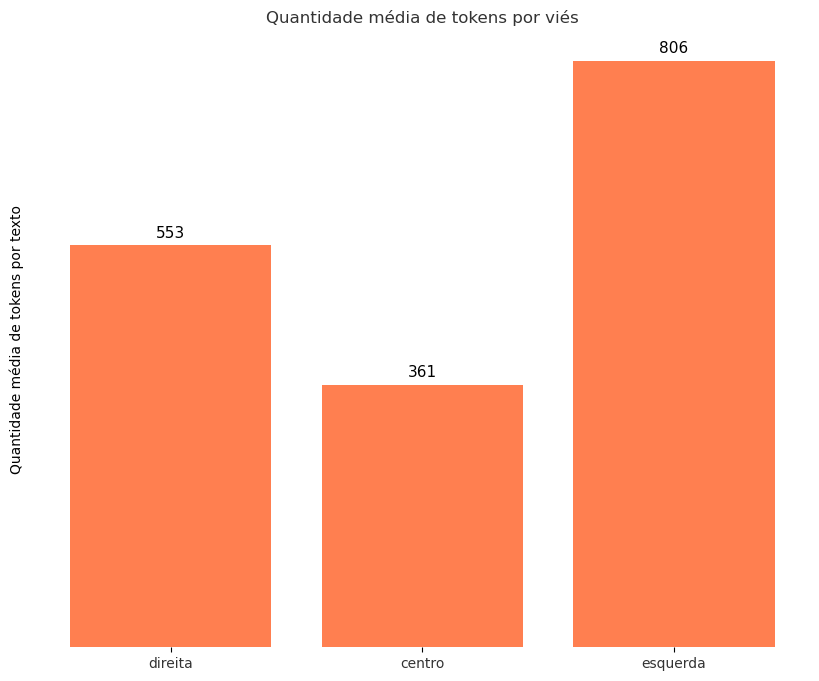

In [42]:
plt.figure(figsize=(10,8))
bars = plt.bar(pos, qnt_media_token_vies, align='center', linewidth=0, color='coral')
plt.xticks(pos, classes, alpha=0.8)
plt.ylabel('Quantidade média de tokens por texto')
plt.title('Quantidade média de tokens por viés', alpha=0.8)

# remocao das bordas
for spine in plt.gca().spines.values(): 
    spine.set_visible(False)

# remocao dos labels y
plt.yticks([])

for bar in bars:

    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, str(int(height)), ha='center', color='black', fontsize=11)

plt.savefig('tokens-medio-por-vies.png')

## Tokens médio por partido

In [43]:
# Calcular a média de tokens por classe usando groupby
media_tokens_por_partido = df.groupby('Partido')['tokens'].mean()

print(f'Média de tokens por texto do partido')
print('-------------------------------------')

for i in range(len(media_tokens_por_partido)):
    label = media_tokens_por_partido.index[i]
    media_tokens_por_partido.values[i] = int(media_tokens_por_partido.values[i])
    media = media_tokens_por_partido.values[i]
    
    print(f'{label}: média de {media} tokens por texto')

Média de tokens por texto do partido
-------------------------------------
MDB: média de 502.0 tokens por texto
Novo: média de 388.0 tokens por texto
PCB: média de 784.0 tokens por texto
PCDoB: média de 554.0 tokens por texto
PDT: média de 770.0 tokens por texto
PL: média de 345.0 tokens por texto
PP: média de 403.0 tokens por texto
PSB: média de 501.0 tokens por texto
PSOL: média de 234.0 tokens por texto
PSTU: média de 1259.0 tokens por texto
PT: média de 712.0 tokens por texto
PV: média de 580.0 tokens por texto
Rede: média de 356.0 tokens por texto
União Brasil: média de 338.0 tokens por texto


In [44]:
classes = df['Partido'].value_counts().index
pos = np.arange(len(classes))
qnt_media_token_partido = media_tokens_por_partido.values

In [45]:
classes = list(classes)
classes[-3] = 'UNIÃO'
classes

['PL',
 'PSB',
 'Novo',
 'PV',
 'PSTU',
 'PCB',
 'PCDoB',
 'MDB',
 'PT',
 'PP',
 'PDT',
 'UNIÃO',
 'Rede',
 'PSOL']

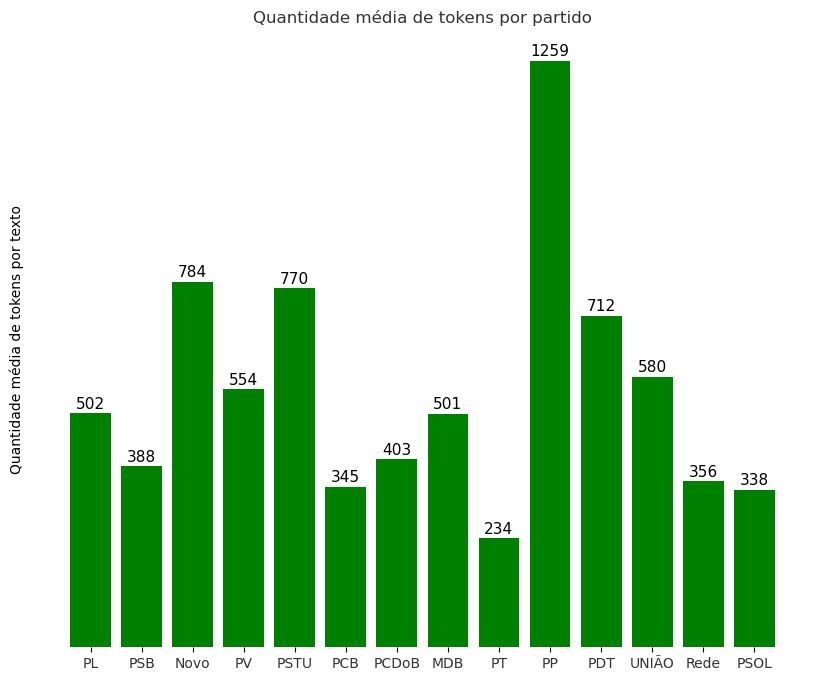

In [47]:
plt.figure(figsize=(10,8))
bars = plt.bar(pos, qnt_media_token_partido, align='center', linewidth=0, color='green')
plt.xticks(pos, classes, alpha=0.8)
plt.ylabel('Quantidade média de tokens por texto')
plt.title('Quantidade média de tokens por partido', alpha=0.8)

# remocao das bordas
for spine in plt.gca().spines.values(): 
    spine.set_visible(False)

# remocao dos labels y
plt.yticks([])

for bar in bars:

    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, str(int(height)), ha='center', color='black', fontsize=11)

plt.savefig('tokens-medio-por-partido.png')